# Predicting House Prices with Linear Regression

Description:

The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model. 

Learning Objectives:

Understanding of linear regression concepts.
Practical experience in implementing a predictive model.
Model evaluation and interpretation skills

# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Dataset

In [5]:
df = pd.read_csv('Housing.csv')

# Data Collection

In [6]:
print (df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [7]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [8]:
df.head ()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [10]:
df.shape

(545, 13)

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [16]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [17]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Categorical Features: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [18]:
# Check if 'price' column is in the dataset
if 'price' in df.columns:
    print("Target variable 'price' is present.")
    
    # Check if the target variable is numerical
    if pd.api.types.is_numeric_dtype(df['price']):
        print("'price' is a numerical variable.")
    else:
        print("'price' is not numerical. Please check the data type.")
else:
    print("Target variable 'price' is missing.")


Target variable 'price' is present.
'price' is a numerical variable.


In [19]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [20]:
area_range = df['area'].max() - df['area'].min()
bedrooms_range = df['bedrooms'].max() - df['bedrooms'].min()

print(f"Range of 'area': {area_range}")
print(f"Range of 'bedrooms': {bedrooms_range}")

Range of 'area': 14550
Range of 'bedrooms': 5


# Data Exploration and Cleaning

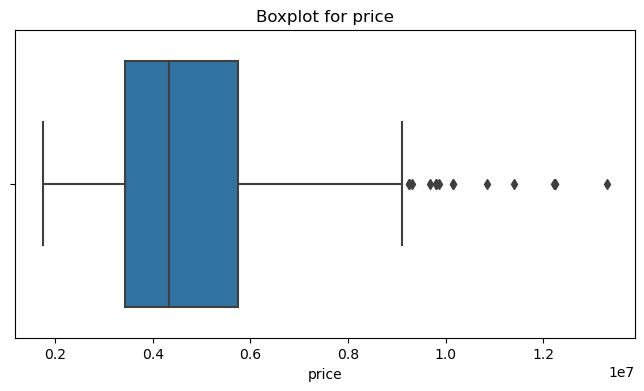

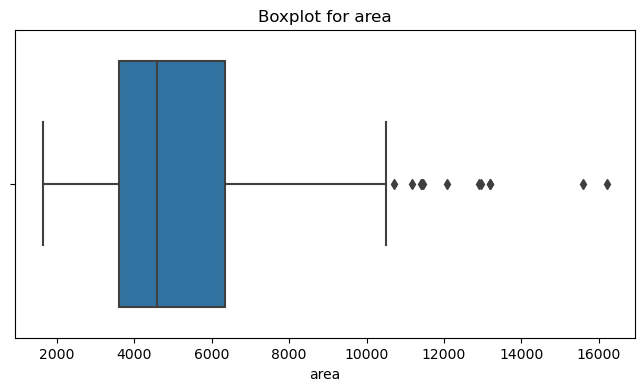

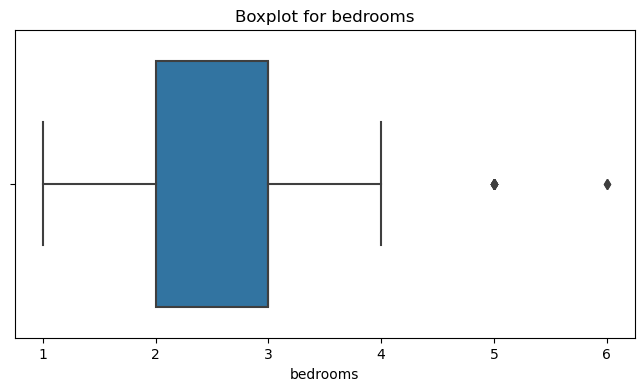

In [21]:
features_to_check = ['price', 'area', 'bedrooms']
for feature in features_to_check:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [22]:
# Function to remove outliers based on IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for a specific feature
df = remove_outliers(df, 'price')


In [23]:
# Using OneHotEncoding for features like 'furnishingstatus', 'mainroad'
df = pd.get_dummies(df, columns=['furnishingstatus', 'mainroad'], drop_first=True)

# Check if encoding worked
print(df.head())


      price  area  bedrooms  bathrooms  stories guestroom basement  \
15  9100000  6000         4          1        2        no      yes   
16  9100000  6600         4          2        2       yes      yes   
17  8960000  8500         3          2        4        no       no   
18  8890000  4600         3          2        2       yes       no   
19  8855000  6420         3          2        2        no       no   

   hotwaterheating airconditioning  parking prefarea  \
15              no              no        2       no   
16              no             yes        1      yes   
17              no             yes        2       no   
18              no             yes        2       no   
19              no             yes        1      yes   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
15                             True                         False   
16                            False                          True   
17                            False

In [24]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to a binary categorical feature like 'guestroom'
le = LabelEncoder()
df['guestroom'] = le.fit_transform(df['guestroom'])

print(df.head())


      price  area  bedrooms  bathrooms  stories  guestroom basement  \
15  9100000  6000         4          1        2          0      yes   
16  9100000  6600         4          2        2          1      yes   
17  8960000  8500         3          2        4          0       no   
18  8890000  4600         3          2        2          1       no   
19  8855000  6420         3          2        2          0       no   

   hotwaterheating airconditioning  parking prefarea  \
15              no              no        2       no   
16              no             yes        1      yes   
17              no             yes        2       no   
18              no             yes        2       no   
19              no             yes        1      yes   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
15                             True                         False   
16                            False                          True   
17                           

In [34]:
# Check the updated column names
print(df.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'mainroad_yes']


In [35]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Alternatively, rename columns if necessary
df.rename(columns={'actual_column_name': 'new_name'}, inplace=True)

# Print the updated column names
print(df.columns.tolist())


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'mainroad_yes']


In [40]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to a binary categorical feature like 'guestroom'
le = LabelEncoder()
df['guestroom'] = le.fit_transform(df['guestroom'])

print(df.head())


      price  area  bedrooms  bathrooms  stories  guestroom  basement  \
15  9100000  6000         4          1        2          0         1   
16  9100000  6600         4          2        2          1         1   
17  8960000  8500         3          2        4          0         0   
18  8890000  4600         3          2        2          1         0   
19  8855000  6420         3          2        2          0         0   

    hotwaterheating  airconditioning  parking  prefarea  \
15                0                0        2         0   
16                0                1        1         1   
17                0                1        2         0   
18                0                1        2         0   
19                0                1        1         1   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
15                             True                             0   
16                            False                             1   
17   

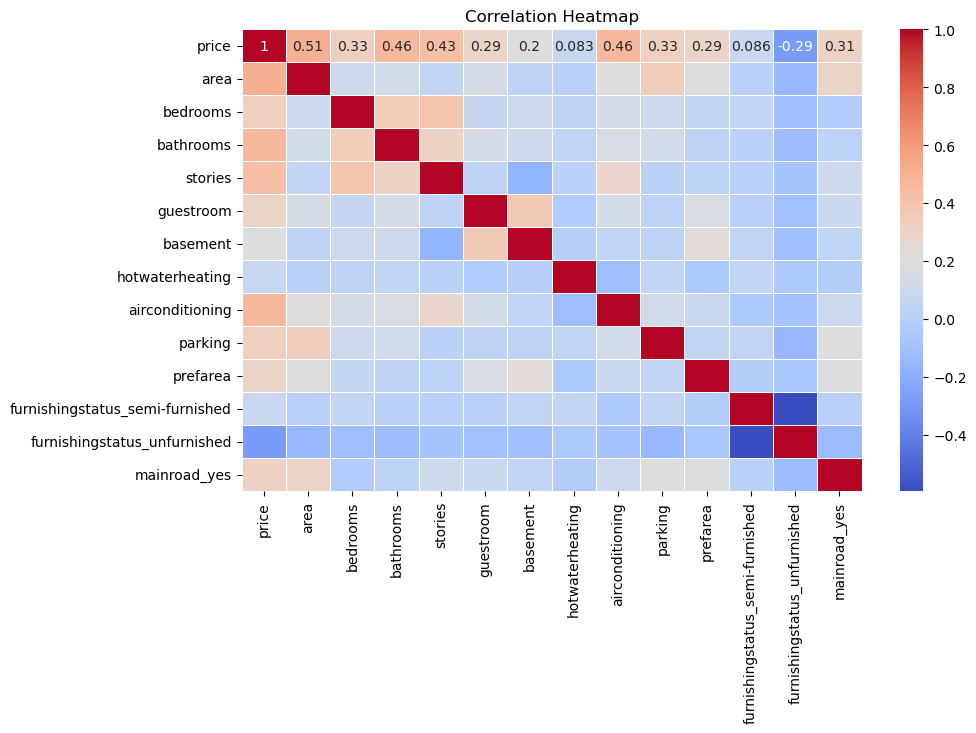

In [43]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Feature Selection

In [45]:
# Calculate correlation matrix to assess feature importance
correlation_matrix = df.corr()

# Display the correlation of features with the target variable 'price'
print(correlation_matrix['price'].sort_values(ascending=False))




price                              1.000000
area                               0.509856
airconditioning                    0.462342
bathrooms                          0.457962
stories                            0.432528
bedrooms                           0.332293
parking                            0.328308
mainroad_yes                       0.310712
prefarea                           0.292536
guestroom                          0.290195
basement                           0.195705
furnishingstatus_semi-furnished    0.085865
hotwaterheating                    0.082829
furnishingstatus_unfurnished      -0.289439
Name: price, dtype: float64


                            Feature  Importance
0                              area    0.467581
2                         bathrooms    0.129774
7                   airconditioning    0.067282
3                           stories    0.056823
11     furnishingstatus_unfurnished    0.052475
8                           parking    0.050305
1                          bedrooms    0.041455
5                          basement    0.034130
9                          prefarea    0.033602
4                         guestroom    0.022167
6                   hotwaterheating    0.015904
10  furnishingstatus_semi-furnished    0.014371
12                     mainroad_yes    0.014130


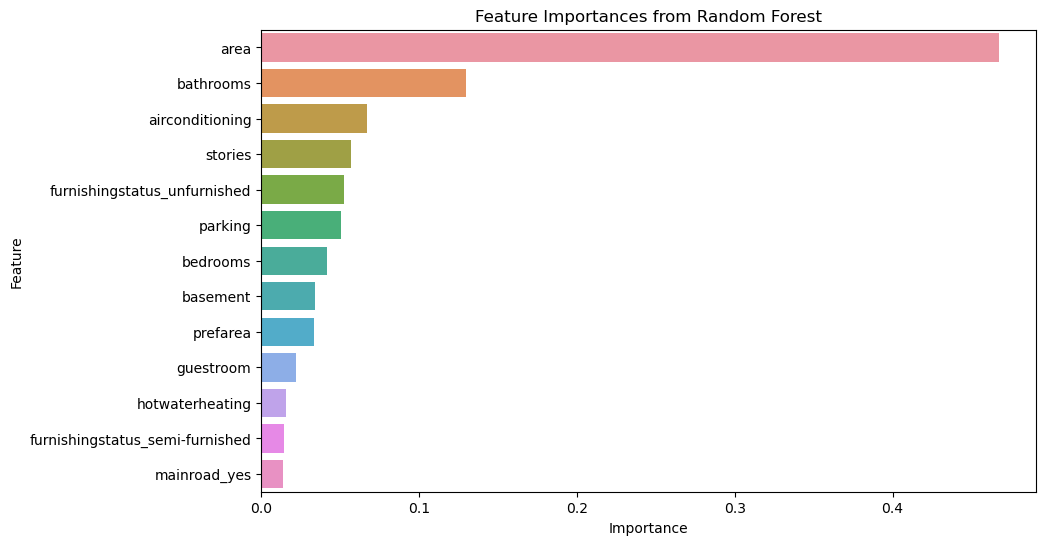

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Separate the target variable (price) and features
X = df.drop(columns=['price'])
y = df['price']

# Train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()


In [47]:
print(df[['stories', 'area']].corr())

          stories      area
stories  1.000000  0.063939
area     0.063939  1.000000


In [48]:
df['bedrooms_per_sqft'] = df['bedrooms'] / df['area']
print(df[['bedrooms', 'area', 'bedrooms_per_sqft']].head())


    bedrooms  area  bedrooms_per_sqft
15         4  6000           0.000667
16         4  6600           0.000606
17         3  8500           0.000353
18         3  4600           0.000652
19         3  6420           0.000467


In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get ranking of features
rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')
print(rfe_ranking)


                            Feature  Ranking
2                         bathrooms        1
6                   hotwaterheating        1
7                   airconditioning        1
9                          prefarea        1
12                     mainroad_yes        1
4                         guestroom        2
11     furnishingstatus_unfurnished        3
3                           stories        4
8                           parking        5
5                          basement        6
1                          bedrooms        7
10  furnishingstatus_semi-furnished        8
0                              area        9


In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso regularization
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Get coefficients of the features
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coefficients = lasso_coefficients[lasso_coefficients['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

print(lasso_coefficients)


                            Feature    Coefficient
2                         bathrooms  811994.227490
6                   hotwaterheating  799470.106916
7                   airconditioning  763324.809569
9                          prefarea  582649.300889
3                           stories  412331.322017
12                     mainroad_yes  406358.767996
4                         guestroom  379602.954694
5                          basement  316981.431820
8                           parking  169705.239914
1                          bedrooms  101584.400822
0                              area     199.970163
10  furnishingstatus_semi-furnished  -85351.065528
11     furnishingstatus_unfurnished -328576.692149


# Model Training

In [51]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (424, 14), Test set size: (106, 14)


In [52]:
# Features included in the model (this assumes all features are relevant)
features = X.columns
print("Features selected for the model:", features)


Features selected for the model: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'bedrooms_per_sqft'],
      dtype='object')


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


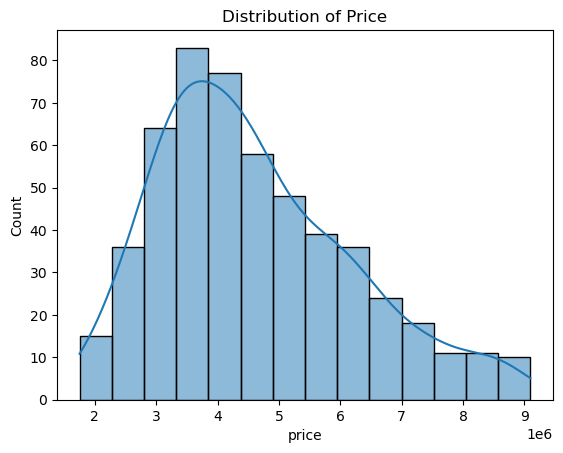

In [53]:
# Check skewness of the target variable 'price'
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


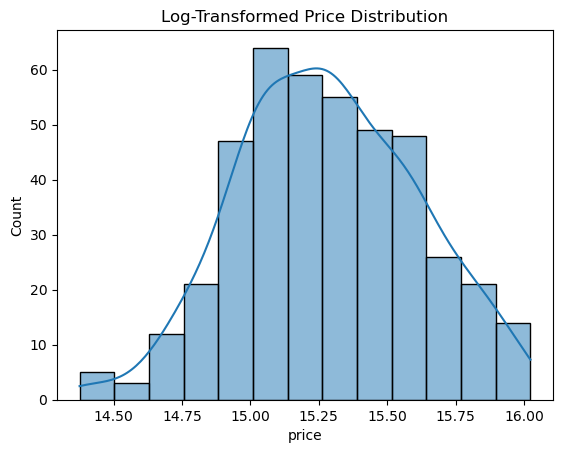

In [54]:
# Apply log transformation to the target variable if it's skewed
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Verify the log transformation
sns.histplot(y_train_log, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()


In [56]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms between 'area' and 'furnishingstatus'
interaction = X_train[['area', 'furnishingstatus_unfurnished']]
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(interaction)

# Add the interaction terms to the feature set
X_train = np.concatenate([X_train, interaction_terms], axis=1)
X_test = np.concatenate([X_test, poly.transform(X_test[['area', 'furnishingstatus_unfurnished']])], axis=1)

print("Interaction terms added to the dataset.")


Interaction terms added to the dataset.


# Model Evaluation

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [61]:
# Example of defining features and target
X = df.drop(columns=['price'])  # Replace 'target_column' with your actual target column name
y = df['price']                   # The target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [63]:
# Predict on the training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [64]:
# Calculate evaluation metrics on the test set
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 1142041889766.7866
R^2 Score: 0.670179830208135
Mean Absolute Error: 773143.8348194358


In [65]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_r2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)

# Print the mean cross-validation scores
print(f"Cross-Validation MSE: {-cv_mse.mean()}")
print(f"Cross-Validation R2: {cv_r2.mean()}")


Cross-Validation MSE: 824544057758.0187
Cross-Validation R2: 0.6345537393256127


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


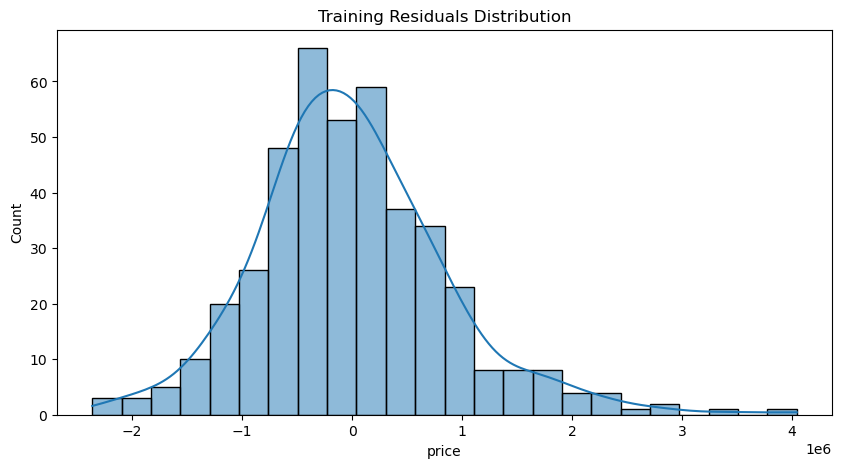

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


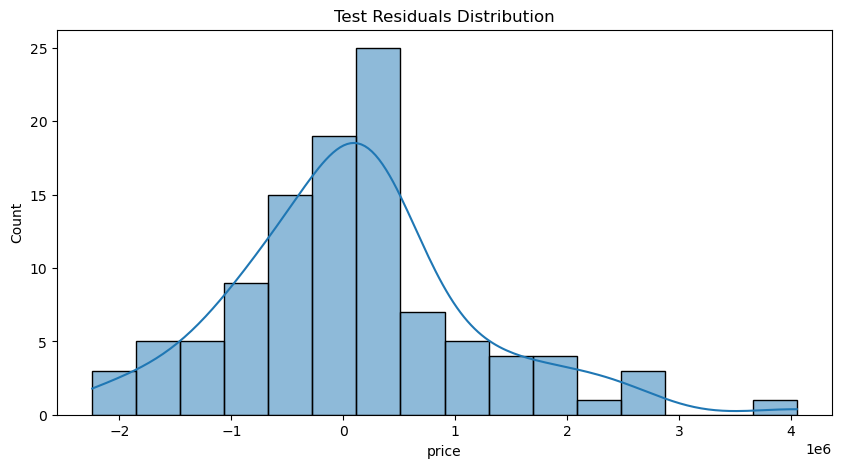

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot histogram of residuals
plt.figure(figsize=(10,5))
sns.histplot(train_residuals, kde=True)
plt.title('Training Residuals Distribution')
plt.show()

# Check residuals normality on test set
plt.figure(figsize=(10,5))
sns.histplot(test_residuals, kde=True)
plt.title('Test Residuals Distribution')
plt.show()


In [70]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Uncomment and set your data file

# Print the columns to check their names
print("Columns in the DataFrame:")
print(df.columns)

# Prepare your features (X) and target (y)
# Replace 'actual_target_column_name' with the actual name of your target column
X = df.drop(columns=['price'])  # Update this line
y = df['price']  # Update this line

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared values for both training and test sets
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f"Training R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Columns in the DataFrame:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'bedrooms_per_sqft'],
      dtype='object')
Training R^2: 0.6697973928870662
Test R^2: 0.670179830208135


In [71]:
# Get model coefficients and interpret them
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print coefficients
print(coefficients)

# Check if the coefficients align with expectations (e.g., larger area should have a positive coefficient)


                            Feature   Coefficient
6                   hotwaterheating  8.086370e+05
2                         bathrooms  7.682674e+05
7                   airconditioning  7.215209e+05
9                          prefarea  6.220290e+05
3                           stories  4.080308e+05
1                          bedrooms  3.944759e+05
5                          basement  3.471203e+05
4                         guestroom  3.075374e+05
12                     mainroad_yes  2.957371e+05
8                           parking  1.596772e+05
0                              area  7.169984e+01
10  furnishingstatus_semi-furnished -1.164520e+05
11     furnishingstatus_unfurnished -3.813751e+05
13                bedrooms_per_sqft -1.250330e+09


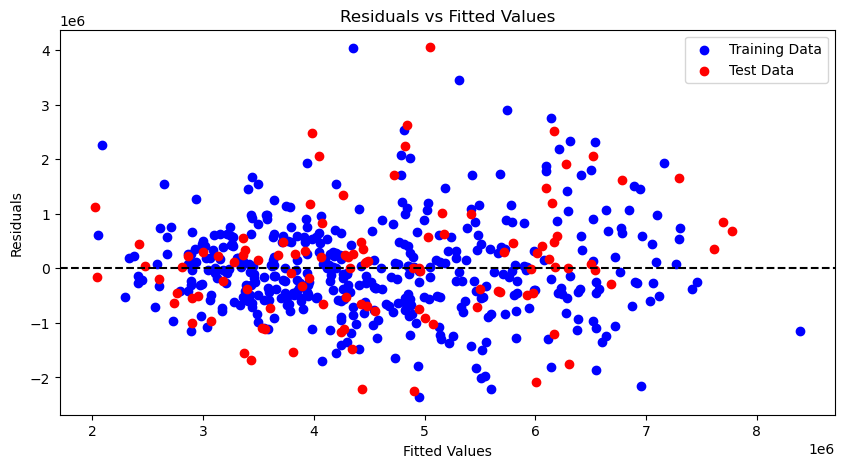

In [72]:
# Plot residuals vs. fitted values
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.scatter(y_test_pred, test_residuals, color='red', label='Test Data')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# Visualization

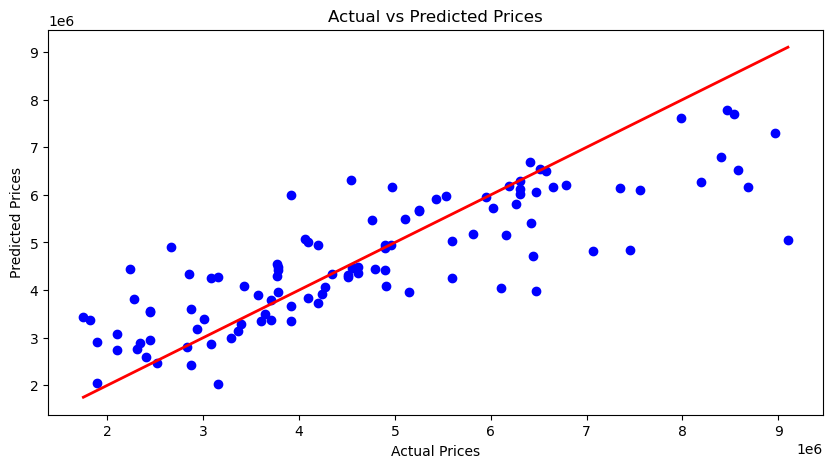

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


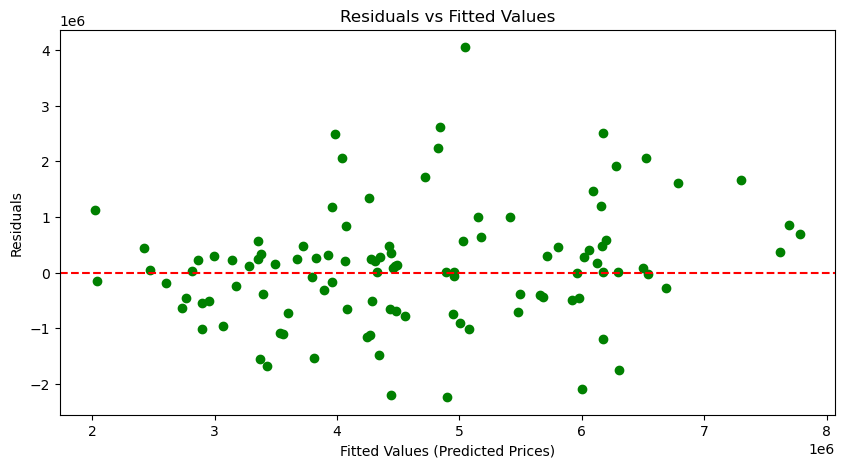

In [74]:
# Residual plot (Actual vs Residuals)
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.show()


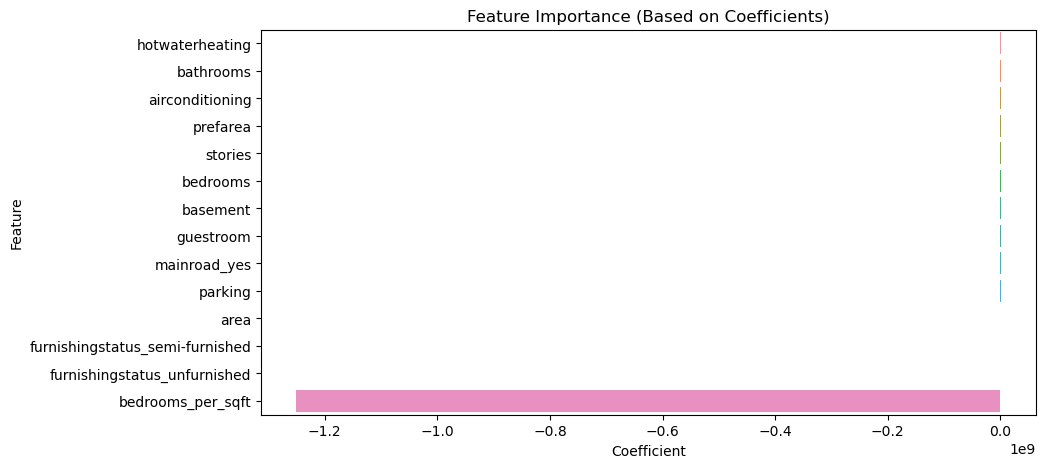

In [75]:
# Feature importance for linear regression (based on coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Bar plot for feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Based on Coefficients)')
plt.show()


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


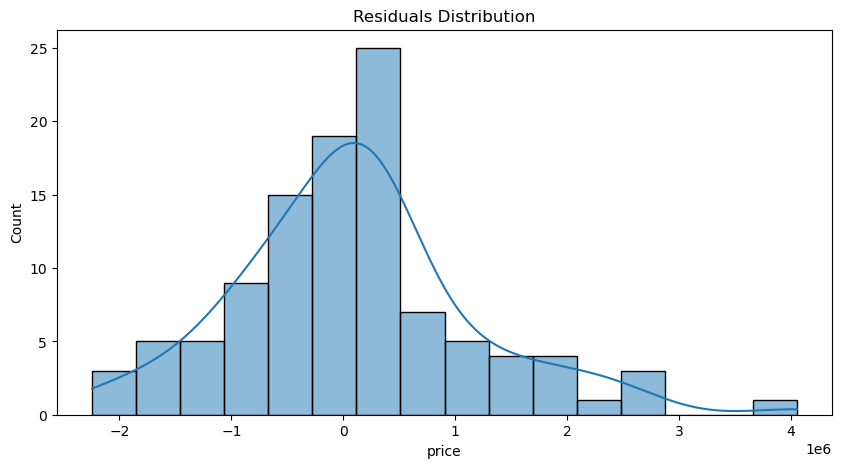

In [78]:
# Residual distribution plot (to check normality)
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
